In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from utils.black_scholes import raiz_ratio, d1_ratio, call_price_ratio
from utils.biseccion import bisec
import math
import scipy.stats as st
from utils.sample import Sample
import pandas as pd

def f(x):
    return raiz_ratio(c, ratio, r, x, T)


In [2]:
## Para crear muestra

obj = Sample(ratio=[0.4, 1.6], T=[0.2,1.1], r=[0.02, 0.1], o=[0.01, 1])
obj.create('my_muestra', 10**5)

my_muestra is done ...


In [3]:
#abro my muestra
obj = Sample()
x, y = obj.open('my_muestra')

In [4]:
df = pd.DataFrame(x, columns=['c/k', 'ratio', 'r', 'T'])

In [5]:
df['o'] = y
df

,c/k,ratio,r,T,o
0,0.187607,1.092918,0.070158,0.391754,0.459644
1,0.137603,0.760031,0.037314,1.039573,0.655252
2,0.349611,1.156901,0.024582,0.736626,0.701870
3,0.201998,1.171010,0.034213,0.206515,0.434334
4,0.074703,0.885961,0.074948,1.001145,0.260764
...,...,...,...,...,...
99995,0.224694,1.166444,0.057646,1.033011,0.093902
99996,0.674388,1.541321,0.059796,1.064901,0.553968
99997,0.308772,1.082259,0.043642,0.889910,0.644566
99998,0.002703,0.619639,0.020641,0.496700,0.364788


In [6]:
def my_f(e):
    return raiz_ratio(e['c/k'], e['ratio'], e['r'], 0.01, e['T'])

def norm_1(e, o=0.01):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], o, e['T']))

def norm_2(e, o=0.01):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], o, e['T'])- o*math.sqrt(e['T']))

In [7]:
def norm1p(e):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], e['o'], e['T']))


def norm2p(e):
    return st.norm.cdf(d1_ratio(e['ratio'], e['r'], e['o'], e['T'])- e['o']*math.sqrt(e['T']))

In [8]:
#tarda tiempo, agregar norm 1 y norm 2
df['f(0.01)'] = df.apply(my_f, axis=1)
df['norm1'] = df.apply(norm_1, axis=1) #es la normal de la volatilidad == 0.01
df['norm2'] = df.apply(norm_1, axis=1) #es la normal de la volatilidad == 0.01
df['norm1p'] = df.apply(norm1p, axis=1) #es la normal de la volatilidad implícita
df['norm2p'] = df.apply(norm2p, axis=1) #es la normal de la volatilidad implícita

In [9]:
df.head(5)

,c/k,ratio,r,T,o,f(0.01),norm1,norm2,norm1p,norm2p
0,0.187607,1.092918,0.070158,0.391754,0.459644,-0.067578,1.000000e+00,1.000000e+00,0.708231,0.602773
1,0.137603,0.760031,0.037314,1.039573,0.655252,-0.137603,2.177625e-118,2.177625e-118,0.492577,0.246136
2,0.349611,1.156901,0.024582,0.736626,0.701870,-0.174766,1.000000e+00,1.000000e+00,0.716745,0.488354
3,0.201998,1.171010,0.034213,0.206515,0.434334,-0.023948,1.000000e+00,1.000000e+00,0.824926,0.769415
4,0.074703,0.885961,0.074948,1.001145,0.260764,-0.074703,2.140932e-06,2.140932e-06,0.481642,0.379442


In [10]:
#casos en los que no puedo aplicar el método de bisección
casos_de_mandinga = df[df['f(0.01)'] > 0]
len(df[((df['norm1'] == 1) & (df['norm2'] == 1)) |
       ((df['norm1'] == 0) & (df['norm2'] == 0))])
len(casos_de_mandinga)

62

In [11]:
# minimo y maximo de la normal calculada con la volatilidad implícita
# muy cercanos a 1
(casos_de_mandinga['norm1p'].min(), casos_de_mandinga['norm1p'].max()) 

(0.9999999999999889, 0.9999999999999999)

In [12]:
#Caso en particular con ratio
e = casos_de_mandinga.iloc[0]
o_posta = e['o']

def f(e, x):
    return raiz_ratio(e['c/k'], e['ratio'], e['r'], x, e['T'])

o = np.sort(np.append(np.linspace(0.01, 1, 100), np.array([o_posta])))
print(o)


[0.01       0.02       0.03       0.04       0.05       0.06
 0.07       0.07502441 0.08       0.09       0.1        0.11
 0.12       0.13       0.14       0.15       0.16       0.17
 0.18       0.19       0.2        0.21       0.22       0.23
 0.24       0.25       0.26       0.27       0.28       0.29
 0.3        0.31       0.32       0.33       0.34       0.35
 0.36       0.37       0.38       0.39       0.4        0.41
 0.42       0.43       0.44       0.45       0.46       0.47
 0.48       0.49       0.5        0.51       0.52       0.53
 0.54       0.55       0.56       0.57       0.58       0.59
 0.6        0.61       0.62       0.63       0.64       0.65
 0.66       0.67       0.68       0.69       0.7        0.71
 0.72       0.73       0.74       0.75       0.76       0.77
 0.78       0.79       0.8        0.81       0.82       0.83
 0.84       0.85       0.86       0.87       0.88       0.89
 0.9        0.91       0.92       0.93       0.94       0.95
 0.96       0.97       0

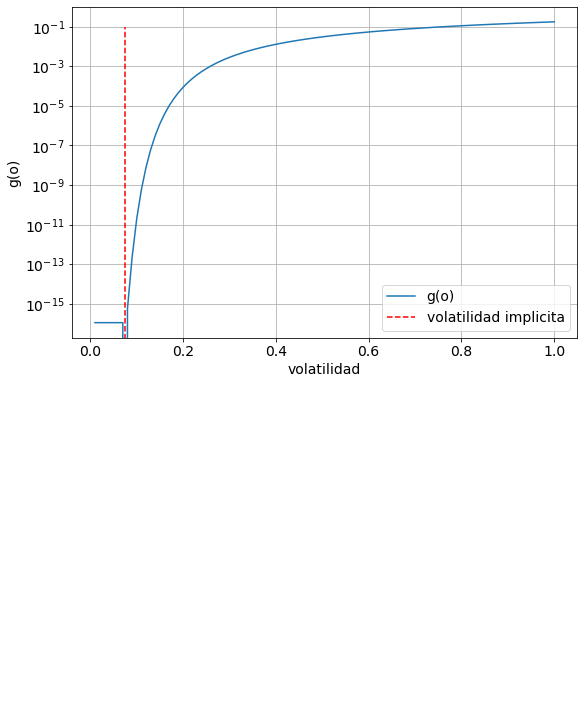

In [17]:
# grafico en funcion de f
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(o, [f(e, i) for i in o], label = 'g(o)')
ax.plot([o_posta]*2, np.linspace(0,0.1,2), 'r--', label = 'volatilidad implicita')
ax.set_xlabel('volatilidad')
ax.set_ylabel('g(o)')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.grid()



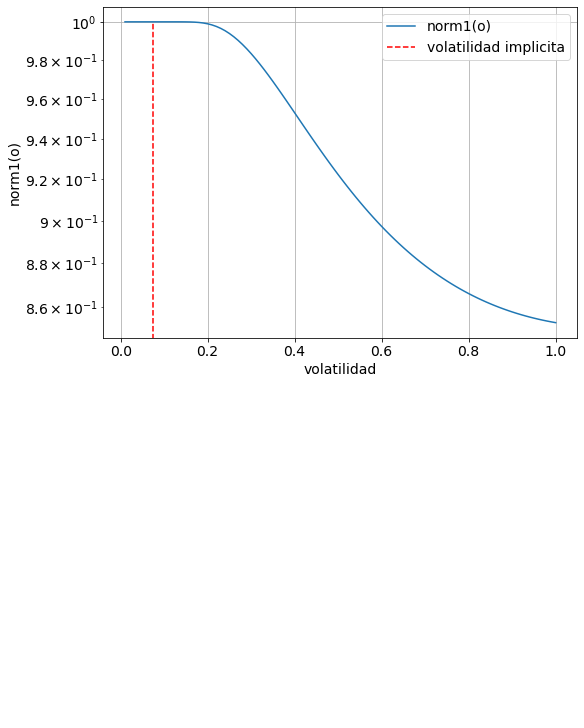

In [14]:
#grafico en funcion de norm1
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
aux = np.linspace(0.01, 1, 100)
ax.plot(aux, [norm_1(e, o=i) for i in aux], label = 'norm1(o)' )
ax.plot([o_posta]*2, np.linspace(0,1,2), 'r--', label = 'volatilidad implicita')
ax.set_xlabel('volatilidad', fontsize=14)
ax.set_ylabel('norm1(o)', fontsize=14)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.grid()
plt.savefig('norm1')

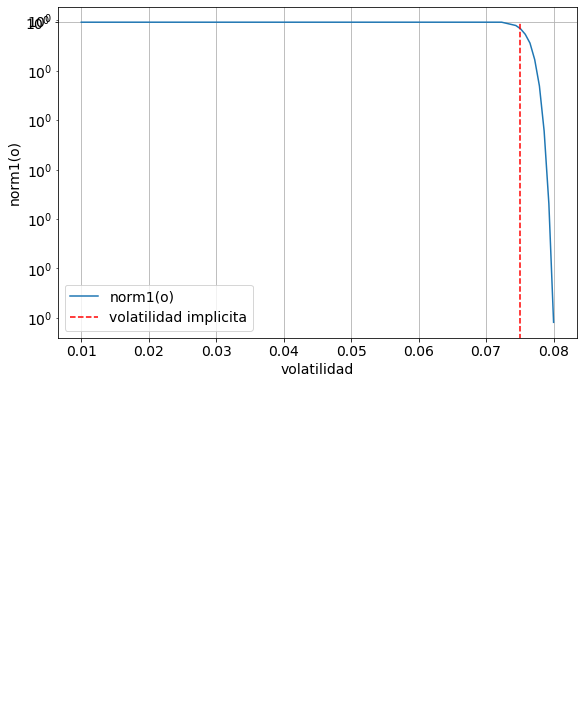

In [15]:
#grafico en funcion de norm1
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
aux = np.linspace(0.01, round(o_posta+0.005, 3), 101)
ax.plot(aux, [norm_1(e, o=i) for i in aux], label = 'norm1(o)')
ax.plot([o_posta]*2, np.linspace(0,1,2), 'r--', label = 'volatilidad implicita')
ax.set_xlabel('volatilidad', )
ax.set_ylabel('norm1(o)')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.grid()
plt.savefig('norm1_c')

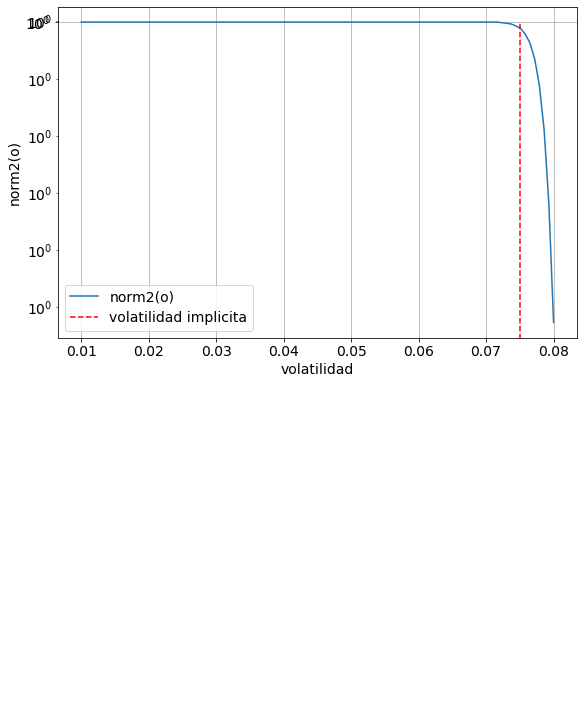

In [16]:
#grafico en funcion de norm2
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(aux, [norm_2(e, o=i) for i in aux], label = 'norm2(o)')
ax.plot([o_posta]*2, np.linspace(0,1,2), 'r--', label = 'volatilidad implicita')
ax.set_xlabel('volatilidad')
ax.set_ylabel('norm2(o)')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.grid()